In [ ]:
#!pip install boto3

In [46]:
!pip -q install s3fs boto3 botocore

import os
from getpass import getpass
import boto3
from botocore.exceptions import ClientError
import pandas as pd

AK = getpass("AWS_ACCESS_KEY_ID: ")
SK = getpass("AWS_SECRET_ACCESS_KEY: ")
ST = getpass("AWS_SESSION_TOKEN (leave blank if not using temp creds): ")

os.environ["AWS_ACCESS_KEY_ID"] = AK
os.environ["AWS_SECRET_ACCESS_KEY"] = SK
if ST: os.environ["AWS_SESSION_TOKEN"] = ST

sts = boto3.client("sts",
                   aws_access_key_id=AK,
                   aws_secret_access_key=SK,
                   aws_session_token=ST or None)
print("Caller:", sts.get_caller_identity())

BUCKET = "finalprojectxai"
KEY    = "processed/hotpot_train_clean.csv"
REGION = "us-east-1"

s3 = boto3.client("s3",
                  region_name=REGION,
                  aws_access_key_id=AK,
                  aws_secret_access_key=SK,
                  aws_session_token=ST or None)

try:
    head = s3.head_object(Bucket=BUCKET, Key=KEY)
    print("head_object ok. Size:", head.get("ContentLength"))
except ClientError as e:
    print("head_object failed:", e.response.get("Error", {}))

# --- 4) Load with s3fs ---
storage_options = {
    "key": AK,
    "secret": SK,
    "token": ST or None,
    "client_kwargs": {"region_name": REGION},
}
path = f"s3://{BUCKET}/{KEY}"
df = pd.read_csv(path, storage_options=storage_options)
df.head()


AWS_ACCESS_KEY_ID: ··········
AWS_SECRET_ACCESS_KEY: ··········
AWS_SESSION_TOKEN (leave blank if not using temp creds): ··········
Caller: {'UserId': 'AIDAS42XTB5NN2TRKRDPV', 'Account': '199362809690', 'Arn': 'arn:aws:iam::199362809690:user/finalproject', 'ResponseMetadata': {'RequestId': '98b45ccd-1960-41d8-a778-ab2c9773ef93', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '98b45ccd-1960-41d8-a778-ab2c9773ef93', 'x-amz-sts-extended-request-id': 'MTp1cy1lYXN0LTE6UzoxNzYyNDA2MjY4NTA4Okc6dzdzMjJ2c2M=', 'content-type': 'text/xml', 'content-length': '409', 'date': 'Thu, 06 Nov 2025 05:17:48 GMT'}, 'RetryAttempts': 0}}
head_object ok. Size: 431891142


,id,question,supporting_facts,context1,sentence1,context2,sentence2,context3,sentence3,context4,...,context26,sentence26,context27,sentence27,context28,sentence28,context29,sentence29,context30,sentence30
0,5a7a06935542990198eaf050,Which magazine was started first Arthur's Maga...,Arthur's Magazine:0; First for Women:0,Radio City (Indian radio station),Radio City is India's first private FM radio s...,Radio City (Indian radio station),It broadcasts on 91.1 (earlier 91.0 in most ci...,Radio City (Indian radio station),"It plays Hindi, English and regional songs.",Radio City (Indian radio station),...,Arthur's Magazine,Arthur's Magazine (1844–1846) was an American ...,Arthur's Magazine,"Edited by T.S. Arthur, it featured work by Edg...",Arthur's Magazine,"In May 1846 it was merged into ""Godey's Lady's...",2014–15 Ukrainian Hockey Championship,The 2014–15 Ukrainian Hockey Championship was ...,2014–15 Ukrainian Hockey Championship,Only four teams participated in the league thi...
1,5a879ab05542996e4f30887e,The Oberoi family is part of a hotel company t...,Oberoi family:0; The Oberoi Group:0,Ritz-Carlton Jakarta,The Ritz-Carlton Jakarta is a hotel and skyscr...,Ritz-Carlton Jakarta,"It is located in city center of Jakarta, near ...",Ritz-Carlton Jakarta,It is operated by The Ritz-Carlton Hotel Company.,Ritz-Carlton Jakarta,...,Hotel Bond,The building was sold at auction to the Roman ...,Hotel Bond,"The Bond Ballroom reopened in 2001, with the r...",The Oberoi Group,The Oberoi Group is a hotel company with its h...,The Oberoi Group,"Founded in 1934, the company owns and/or opera...",Future Fibre Technologies,Future Fibre Technologies (FFT) is a fiber opt...
2,5a8d7341554299441c6b9fe5,Musician and satirist Allie Goertz wrote a son...,Allie Goertz:0; Allie Goertz:1; Allie Goertz:2...,Lisa Simpson,Lisa Marie Simpson is a fictional character in...,Lisa Simpson,She is the middle child and most intelligent o...,Lisa Simpson,"Voiced by Yeardley Smith, Lisa first appeared ...",Lisa Simpson,...,Allie Goertz,The album was made possible through Kickstarter.,Allie Goertz,She is co-host of Everything's Coming Up Podca...,Milhouse Van Houten,Milhouse Mussolini van Houten is a fictional c...,Milhouse Van Houten,"Later in the series, it is revealed that Milho...",Los Angeles Reader,Los Angeles Reader was a weekly paper establis...
3,5a82171f5542990a1d231f4a,What nationality was James Henry Miller's wife?,Peggy Seeger:0; Peggy Seeger:1; Ewan MacColl:0,"Moloch: or, This Gentile World","Moloch: or, This Gentile World is a semi-autob...","Moloch: or, This Gentile World","The book went unpublished until 1992, 65 years...","Moloch: or, This Gentile World",It is widely considered to be of interest more...,"Launceston by-election, 1874",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a84dd955542997b5ce3ff79,Cadmium Chloride is slightly soluble in this c...,Cadmium chloride:1; Ethanol:0,Cadmium chloride,Cadmium chloride is a white crystalline compou...,Cadmium chloride,It is a hygroscopic solid that is highly solub...,Cadmium chloride,"Although it is considered to be ionic, it has ...",Cadmium chloride,...,Magnesium chloride,Anhydrous magnesium chloride is the principal ...,Magnesium chloride,Hydrated magnesium chloride is the form most r...,Ethanol,"Ethanol, also called alcohol, ethyl alcohol, a...",Ethanol,Its formula can be written also as CH3 −CH2 −O...,Ethanol,"Ethanol is a volatile, flammable, colorless li..."


In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,5)


In [51]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nColumn names:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90447 entries, 0 to 90446
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                90447 non-null  object
 1   question          90447 non-null  object
 2   supporting_facts  90447 non-null  object
 3   context1          90447 non-null  object
 4   sentence1         90447 non-null  object
 5   context2          90447 non-null  object
 6   sentence2         90445 non-null  object
 7   context3          90439 non-null  object
 8   sentence3         90431 non-null  object
 9   context4          90403 non-null  object
 10  sentence4         90390 non-null  object
 11  context5          90352 non-null  object
 12  sentence5         90334 non-null  object
 13  context6          90300 non-null  object
 14  sentence6         90285 non-null  object
 15  context7          90243 non-null  object
 16  sentence7         90228 non-null  object
 17  context8    

count    90447.000000
mean         2.399350
std          0.697254
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: num_supporting_facts, dtype: float64


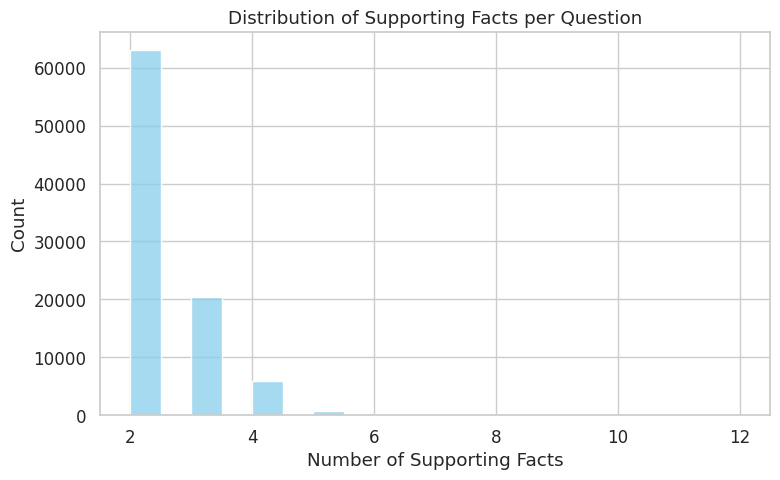

In [52]:
df["supporting_facts_list"] = df["supporting_facts"].astype(str).apply(
    lambda x: [s.strip() for s in x.split(";") if s.strip()]
)
df["num_supporting_facts"] = df["supporting_facts_list"].apply(len)

print(df["num_supporting_facts"].describe())

plt.figure(figsize=(8,5))
sns.histplot(df["num_supporting_facts"], bins=20, color="skyblue")
plt.title("Distribution of Supporting Facts per Question")
plt.xlabel("Number of Supporting Facts")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

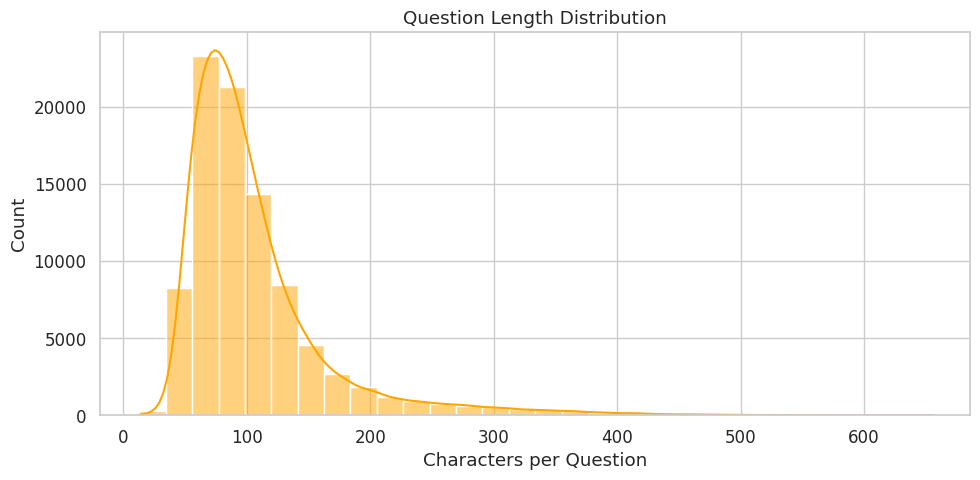

In [54]:
df["question_length"] = df["question"].astype(str).str.len()

sns.histplot(df["question_length"], bins=30, kde=True, color="orange")
plt.title("Question Length Distribution")
plt.xlabel("Characters per Question")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


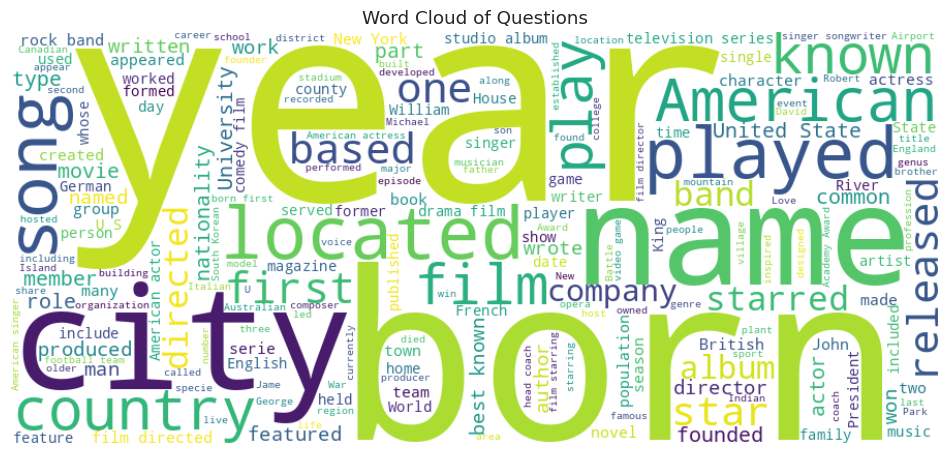

In [57]:
text = " ".join(df["question"].astype(str))
wordcloud = WordCloud(width=900, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.show()